# Visualization for Delegation Based Lock

In [1]:
@time using DataFrames, CSV, StatsPlots

bench = @time CSV.read("output/output.csv", DataFrame);


  6.603925 seconds (7.42 M allocations: 432.959 MiB, 5.19% gc time, 4.62% compilation time: 93% of which was recompilation)


  0.941562 seconds (699.54 k allocations: 46.543 MiB, 2.02% gc time, 99.74% compilation time: 73% of which was recompilation)


  2.718672 seconds (5.76 M allocations: 338.736 MiB, 4.57% gc time, 99.21% compilation time: 37% of which was recompilation)


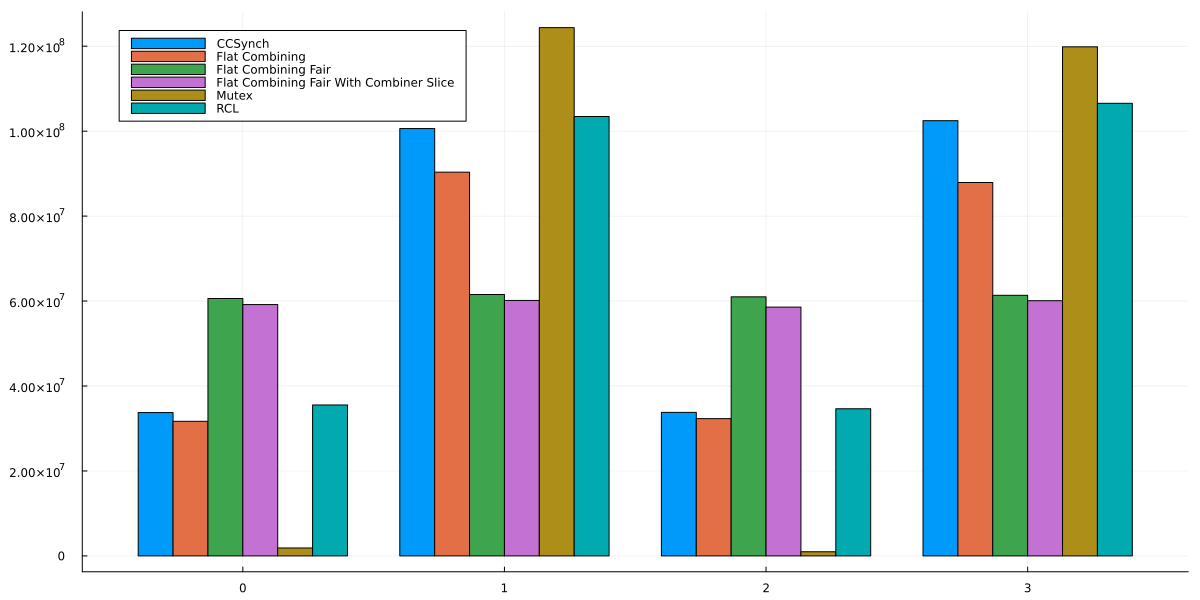

In [2]:
using StatsPlots

loop_comparison = @time @df bench groupedbar(:Id, :LoopCount, group=:Locktype, size=(1200,600))
savefig(loop_comparison, "graphs/loop_comparison.svg")
loop_comparison

In [4]:
bench

Row,Id,CpuId,LoopCount,NumAcquire,HoldTime,CombineTime,Locktype
,Int64,Int64,Int64,Int64,Int64,Int64?,String
1,0,0,31693015,56318,629,missing,Flat Combining
2,1,1,90340763,55100,1677,missing,Flat Combining
3,2,2,32328618,58309,660,15940860532,Flat Combining
4,3,3,87903770,53443,1632,308701,Flat Combining
5,0,0,60601740,102277,1037,4378151481,Flat Combining Fair
6,1,1,61538541,34506,1047,2348476561,Flat Combining Fair
7,2,2,60989186,102823,1041,5029607599,Flat Combining Fair
8,3,3,61356259,34420,1046,2496032675,Flat Combining Fair
9,0,0,59181220,101272,1030,3597557789,Flat Combining Fair With Combiner Slice


  0.259723 seconds (262.49 k allocations: 16.484 MiB, 98.15% compilation time)


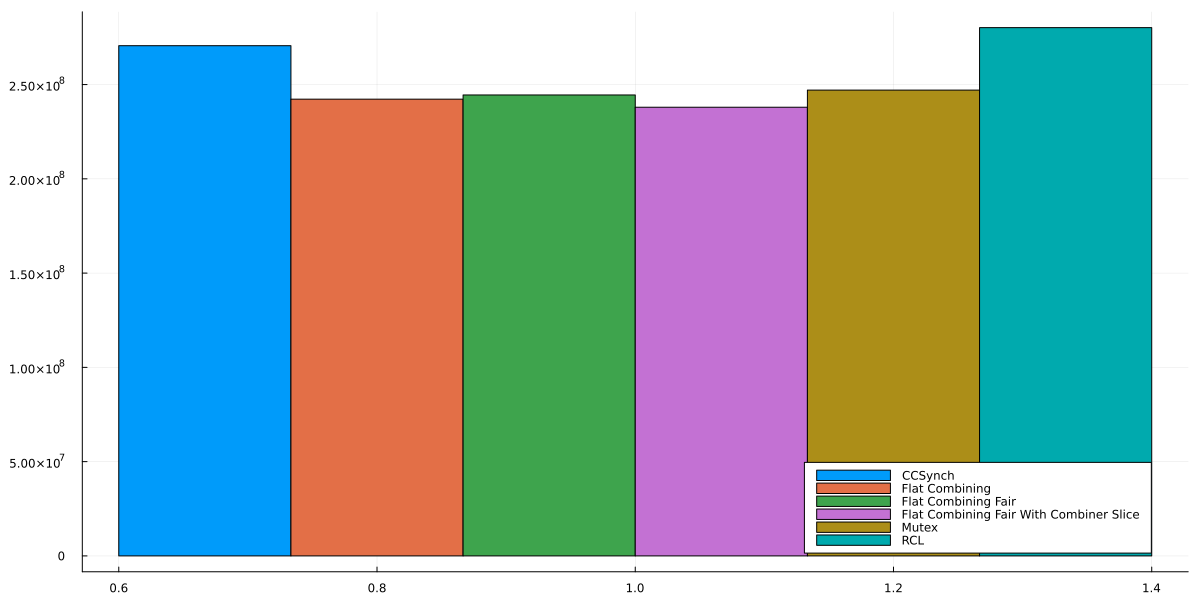

In [5]:
using Tidier

bench_all = @time @chain bench begin
    @group_by(Locktype)
    @summarize(overall_loop = sum(LoopCount))
end

@time @df bench_all groupedbar(:overall_loop, group=:Locktype, size=(1200,600))



  2.859833 seconds (5.84 M allocations: 344.368 MiB, 4.99% gc time, 99.47% compilation time: 35% of which was recompilation)


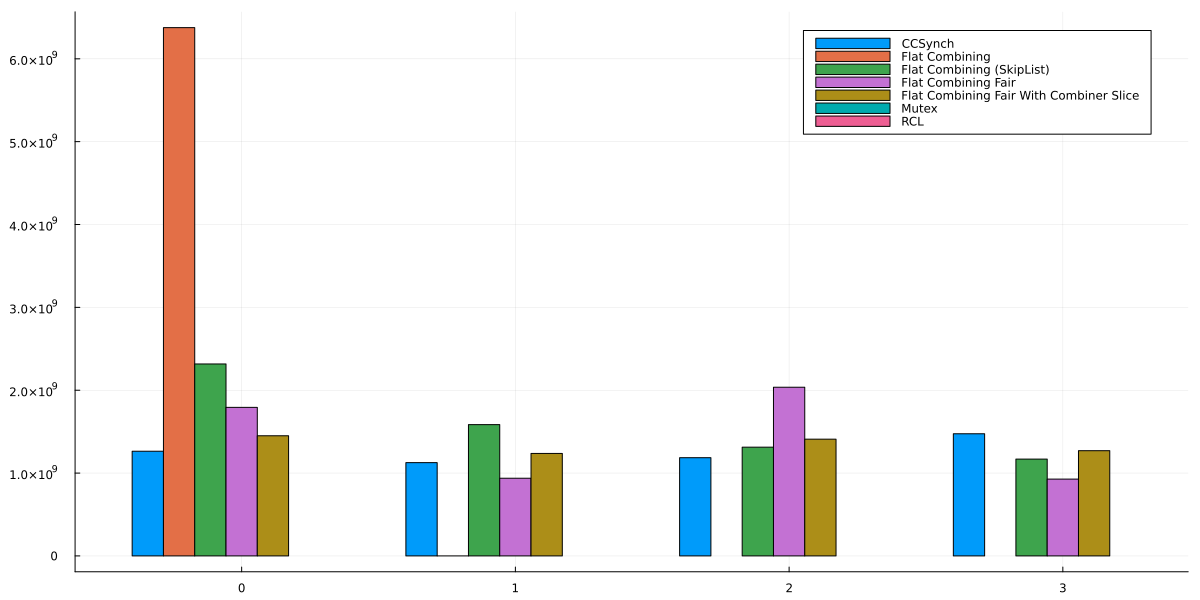

In [2]:
combiner_time_comparison = @time @df bench groupedbar(:Id, :CombineTime, group=:Locktype, size=(1200,600))
savefig("graphs/combiner_time_comparison.svg")
combiner_time_comparison
